# Assignment 09 - Neural Network¶
This assignment revoles around working with Neural Netowork

## Obnoxious Consequence
- Martin Snedvig Rasmussen
- Michael Ejdal Lundsgaard
- Morten Bokkenheuser-Bæhr
- Simon Kepp Stennicke

# Review questions

1. Did the student correctly and programmatically download and import the csv data? Was the head of the data shown?
2. Did the student correctly display the scatter plot? Could anything be improved about the code in question?
3. Did the student reflect on the importance of the `GP` attribute. Do you have any comments about the reflection on the `GP` attribute?

In [1]:
import pandas as pd
from glob import glob
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc
import sklearn.linear_model as lm
import numpy as np
%matplotlib notebook

## Part 1
1. Programatically download the raw csv data.
2. Import the data into a pandas dataframe.
3. Print the head of the dataset.

In [6]:
!python download_url.py https://raw.githubusercontent.com/PranayMalhotra/NBA-player-career-lengths/master/nba_logreg.csv | ls

Assignment09.ipynb
download_url.py
nba_logreg.csv
README.md
requirements.txt


In [2]:
local_file = glob('*.csv')[0]
data = pd.read_csv(local_file)
data.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Part 2
1. Find the names of the top 10 3-point shooters (`3p_made`) in the dataset.
2. On a scatter plot, show the relationship between `x=GP` and `y=target_5yrs`.
3. Does the scatter plot show a relationship between the two attributes?

In [33]:
three_point = data.sort_values(by=['3p_made'], ascending=False)[:10]
print(three_point['name'])

585       Damian Lillard
698        Stephen Curry
1087      Jason Williams
1157      Allen Iverson*
922         Kirk Hinrich
1158       Kerry Kittles
1190    Damon Stoudamire
1164        Matt Maloney
699     Brandon Jennings
1090         Paul Pierce
Name: name, dtype: object


In [74]:
gp_5yrs_player = data.sort_values(by=['gp'], ascending=False)
gp_5yrs_player['gp'].iloc[0]

82

Text(0, 0.5, 'Target 5 Years')

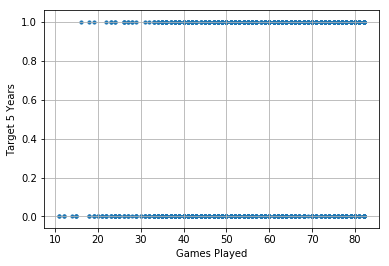

In [3]:
x = data.loc[:,'gp']
y = data.loc[:,'target_5yrs']

plt.scatter(x, y, s=10)
plt.grid()
plt.xlabel('Games Played', fontsize=10)
plt.ylabel('Target 5 Years', fontsize=10)

There's not really any relation between these two attributes isolated... If we should get any meaningful information we needed to compared the target_5yrs with more of the features...

Since this dataset only takes the data from the players rookie season, there's some players that could have gotten injured etc.

Which explains the *mystery* that a player can play around 15 games, and have a 5 year carrier!

## Part 3
1. Create a classifier that can predict whether or not a player will play for 5 years in the NBA.
2. Use your classifier, find examples where the result is both `0` and `1`.
3. Reflect on the importance of the `GP` attribute. Is it more or less important, than the other attributes.

In [5]:
# x_reshape = np.array(x).reshape(-1, 1)

# model = lm.LinearRegression()
# model.fit(x_reshape, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# For some reason it doesn't like if we add '3p' as one of our features

features = ['gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', 'ftm', 'fta', 'ft', 'reb', 'ast', 'blk']
target = data['target_5yrs']

model = dtc(max_leaf_nodes=1000, random_state=0)
model.fit(data[features], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
player_with_5yr = [[58, 11.6, 5.7, 2.3, 5.5, 42.6, 0.1, 0.5, 0.9, 1.3, 68.9, 1.9, 0.8, 0.1]]
player_without_5yr = [[35, 26.9, 7.2, 2.0, 6.7, 29.6, 0.7, 2.8, 2.6, 3.4, 76.5, 2.4, 3.7, 0.5]]

prediction_with_5yr = model.predict(player_with_5yr)
prediction_without_5yr = model.predict(player_without_5yr)
 
print('Player with 5 year: ', prediction_with_5yr)
print('Player withouth 5 year:', prediction_without_5yr)

Player with 5 year:  [1.]
Player withouth 5 year: [0.]


You can't look at the features individually and say which has the higher weight... withing setting it up that way in a neural network *(which the assignment dosnt specificy)* - However, if we look back on the graph we can see that after 30 games the chances of getting a 5 year carrier are much higher.